## Analysis Mushroom Data

### Introduction

Mushrooms are a beloved delicacy among people, but beneath their glamorous appearance, they may harbor deadly dangers. China is one of the countries with the largest variety of mushrooms in the world. At the same time, mushroom poisoning is one of the most serious food safety issues in China. According to relevant reports, in 2021, China conducted research on 327 mushroom poisoning incidents, involving 923 patients and 20 deaths, with a total mortality rate of 2.17%. For non professionals, it is impossible to distinguish between poisonous mushrooms and edible mushrooms based on their appearance, shape, color, etc. There is no simple standard that can distinguish between poisonous mushrooms and edible mushrooms. To determine whether mushrooms are edible, it is necessary to collect mushrooms with different characteristic attributes and analyze whether they are toxic. In this competition, 22 characteristic attributes of mushrooms were analyzed to obtain a mushroom usability model, which can better predict whether mushrooms are edible.
[Mushroom Data](https://www.kaggle.com/datasets/sakurapuare/mushroom-classification-enhanced)

### Attribute Information
1. **classes (target)**: edible=e, poisonous=p.
2. **cap-shape**: bell=b, conical=c, convex=x,flat=f, knobbed=k, sunken=s
3. **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
4. **cap-color**: brown=n, buff=b,cinnamon=c, gray=g, green=r,pink=p ,purple=u, red=e, white=w, yellow=y
5. **ruises**: bruises=t, no=f
6. **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
7. **gill-attachment**: attached=a, descending=d, free=f, notched=n
8. **gill-spacing**: close=c, crowded=w, distant=d
9. **gill-size**: broad=b, narrow=n
10. **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
11. **stalk-shape**: enlarging=e, tapering=t
12. **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
13. **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
14. **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
15. **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
17. **veil-type**: partial=p, universal=u
18. **veil-color**: brown=n, orange=o, white=w, yellow=y
19. **ring-number**: none=n, one=o, two=t
20. **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
21. **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
22. **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
23. **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Importing Dataset

In [12]:
# Libraries to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Importing the dataset
mushroom_dataset = pd.read_csv('../assets/data/mushroom.csv')
mushroom_dataset.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


### Initial Data Exploration

In [6]:
mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 22513 non-null  object
 2   cap-surface               22507 non-null  object
 3   cap-color                 22527 non-null  object
 4   ruises                    22514 non-null  object
 5   odor                      22536 non-null  object
 6   gill-attachment           22505 non-null  object
 7   gill-spacing              22587 non-null  object
 8   gill-size                 22494 non-null  object
 9   gill-color                22418 non-null  object
 10  stalk-shape               22512 non-null  object
 11  stalk-root                22458 non-null  object
 12  stalk-surface-above-ring  22478 non-null  object
 13  stalk-surface-below-ring  22563 non-null  object
 14  stalk-color-above-ring

In [9]:
mushroom_dataset.iloc[:,0:12].describe(include='all')

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
count,25986,22513,22507,22527,22514,22536,22505,22587,22494,22418,22512,22458
unique,2,6,4,10,2,9,2,2,2,12,2,5
top,e,x,y,n,f,n,f,c,b,b,t,b
freq,14354,7674,7602,4810,12361,6986,17811,16092,13997,3679,12171,8123


In [10]:
mushroom_dataset.iloc[:,13:].describe(include='all')

,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,22563,22413,22553,22489,22483,22497,22478,22493,22475,22502
unique,4,9,9,1,4,3,5,9,6,7
top,s,w,w,p,w,o,p,w,v,d
freq,10619,8580,8403,22489,15742,15713,8501,5085,8409,6573


We can see there are null data in all columns of the dataset, we see graphics that help to understand the data.

### Data Visualization

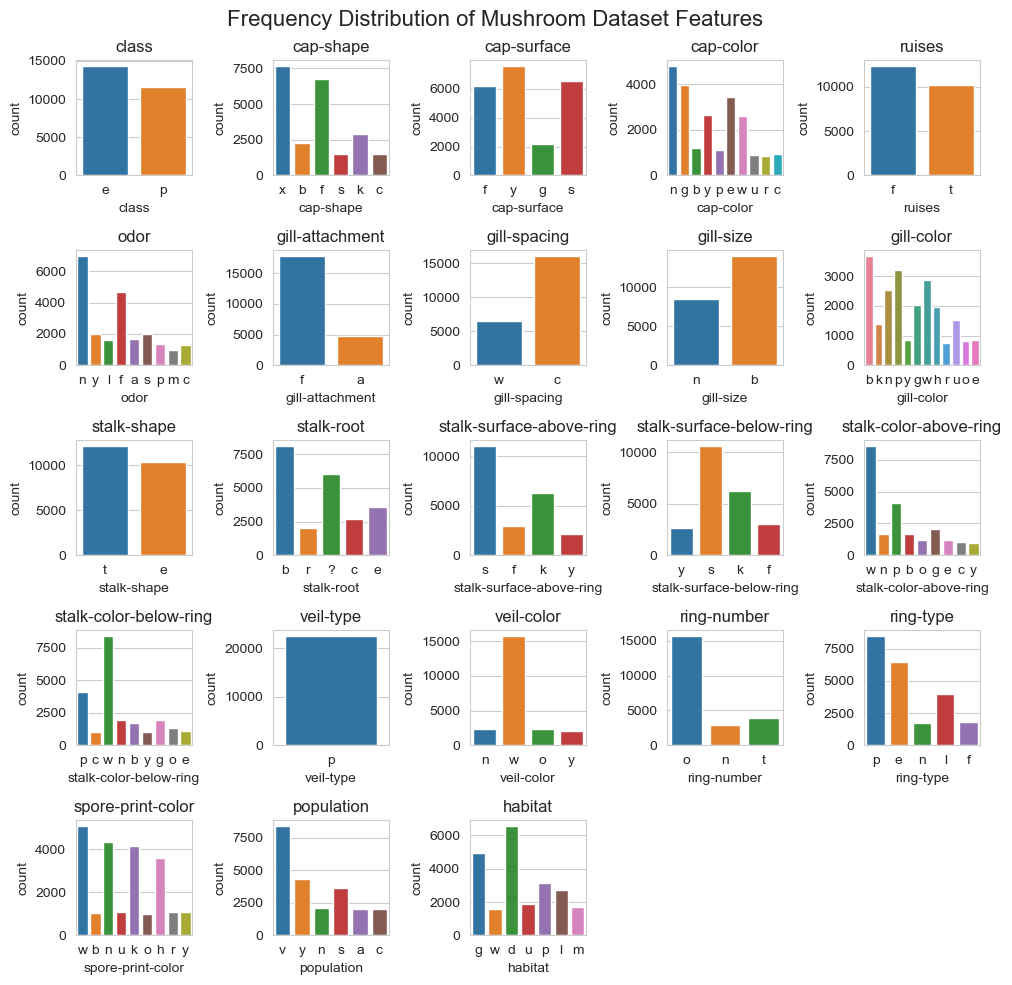

In [25]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(5, 5, figsize=(10, 10))

num_cols = len(mushroom_dataset.columns)

axs = axs.flatten()

for i, col in enumerate(mushroom_dataset.columns):
    sns.countplot(x=col, data=mushroom_dataset, ax=axs[i], hue=col, legend=False)
    axs[i].set_title(f'{col}', fontsize=12)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Frequency Distribution of Mushroom Dataset Features', fontsize=16)

plt.subplots_adjust(top=0.92)

plt.tight_layout()

plt.show()